In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [18]:
# Load data
df = pd.read_csv("projectData.csv",',')

print('Dataset Shape:', df.shape)
print('Dataset Features:')
df.head()

Dataset Shape: (114699, 9)
Dataset Features:


,Blue,Green,Red,NIR,Redge,DSM,Thermal,Land_Cover,Category
0,0.015358,0.022966,0.033320,0.095942,0.043045,0.260843,0.376667,1,Soil
1,0.016016,0.020970,0.029661,0.072465,0.034426,0.244706,0.385827,1,Soil
2,0.016413,0.018995,0.028968,0.073492,0.033930,0.261559,0.422678,1,Soil
3,0.016847,0.023507,0.031548,0.078247,0.039698,0.256285,0.414622,1,Soil
4,0.017246,0.026177,0.037553,0.085038,0.047319,0.254233,0.278497,3,vegCluster


In [19]:
df.describe()

,Blue,Green,Red,NIR,Redge,DSM,Thermal,Land_Cover
count,114699.000000,114699.000000,114699.000000,114699.000000,114699.000000,114699.000000,114699.000000,114699.000000
mean,0.065602,0.085900,0.103805,0.145224,0.119880,0.312021,0.268371,2.811036
std,0.032419,0.043076,0.055605,0.066014,0.061459,0.098472,0.080544,1.506947
min,0.015358,0.018995,0.022554,0.044062,0.021959,0.158338,0.137255,1.000000
25%,0.046413,0.060181,0.069918,0.099650,0.081921,0.257062,0.196078,1.000000
50%,0.057107,0.073478,0.087149,0.118998,0.100159,0.293465,0.248452,3.000000
75%,0.073674,0.096052,0.116599,0.175060,0.136537,0.332204,0.323603,4.000000
max,0.493295,0.556053,0.567742,0.599838,0.597277,0.971952,0.610274,6.000000


In [20]:
X = df[['Blue', 'Green','Red','NIR','Redge','DSM','Thermal']]
y = df['Land_Cover']

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [22]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
LR = LogisticRegression(solver='lbfgs',class_weight='balanced', multi_class='multinomial', max_iter=10000)
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

In [24]:
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

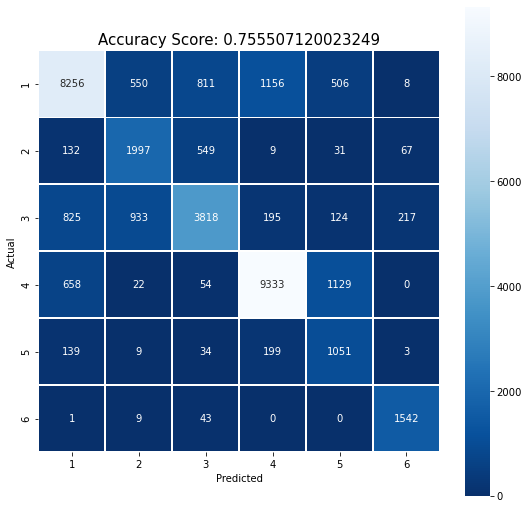

In [25]:
plt.figure(figsize=(9,9))
sn.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual');
plt.xlabel('Predicted');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);

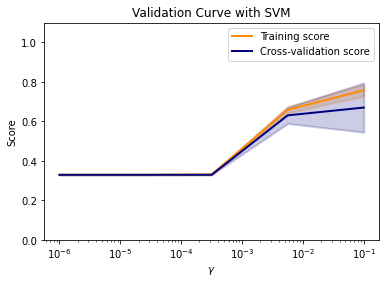

In [27]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [11]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.755507120023249


In [14]:


n_classes = 6
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

NameError: name 'roc_curve' is not defined

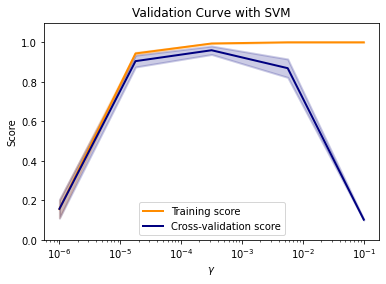

In [15]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

X, y = load_digits(return_X_y=True)

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()